In [3]:
#Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
#import keras
import tensorflow as tf
from sklearn.utils import shuffle  
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix
import pandas as pd
from tqdm import tqdm
import os
import seaborn as sns
import cv2
from PIL import Image

In [4]:
#Declaring Default Parameters
IMAGE_SIZE=(150,150)

class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = [0,1,2,3,4,5]
mapclass={0:'mountain',1:'street',2:'glacier',3:'buildings',4:'sea',5:'forest'}

In [5]:
    # os.chdir('')
    # os.getcwd()
    # os.listdir()

In [6]:
#loading dataset
def load_train_data():
    images=[]
    labels=[]
    output=[]
    folders=['/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_train/seg_train/mountain',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_train/seg_train/street',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_train/seg_train/glacier',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_train/seg_train/buildings',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_train/seg_train/sea',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_train/seg_train/forest']
    for i in range(0,len(folders)):
        for file in tqdm(os.listdir(folders[i])):
            img_path = os.path.join(folders[i], file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(i)
    images = np.array(images, dtype = 'float32')/255
    labels = np.array(labels, dtype = 'int32')
    return images,labels




In [7]:
#Loading testing data
def load_test_data():
    images=[]
    labels=[]
    output=[]
    folders=['/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_test/seg_test/mountain',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_test/seg_test/street',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_test/seg_test/glacier',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_test/seg_test/buildings',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_test/seg_test/sea',
             '/mnt/batch/tasks/shared/LS_root/mounts/clusters/intel-images/code/Users/Victor.Olet/kaggle/input/intel-image-classification/seg_test/seg_test/forest']
    for i in range(0,len(folders)):
        for file in tqdm(os.listdir(folders[i])):
            img_path = os.path.join(folders[i], file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(i)
    images = np.array(images, dtype = 'float32')/255
    labels = np.array(labels, dtype = 'int32')
    return images,labels

In [8]:
train_images,train_labels=load_train_data()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2271/2271 [02:52<00:00, 13.16it/s]


In [9]:
# train_images= []
# train_labels = []
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)


In [10]:
# test_images= []
# test_labels = []
test_images,test_labels=load_test_data()


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 474/474 [00:24<00:00, 19.66it/s]


In [11]:
len(train_images)

14034

In [12]:
len(test_images)

3000

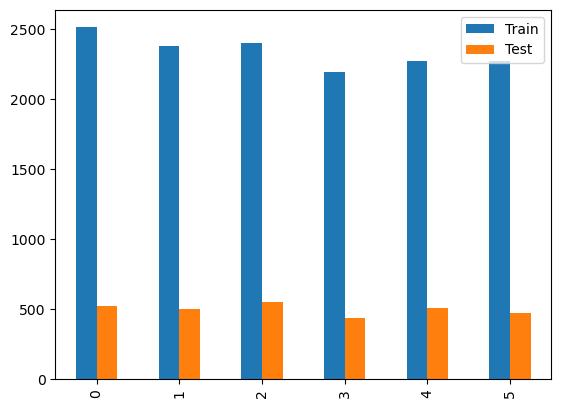

In [13]:
#Visulaing data
df=pd.concat([pd.DataFrame(np.unique(train_labels,return_counts=True)).drop(0).rename(index={1:'Train'}).T,
              pd.DataFrame(np.unique(test_labels,return_counts=True)).drop(0).rename(index={1:'Test'}).T],axis=1)
df.plot(kind='bar')
plt.show()


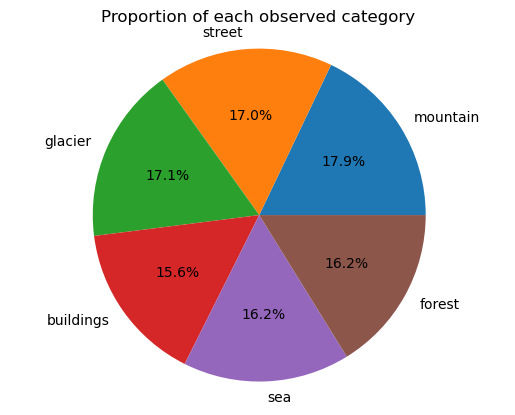

In [14]:
plt.pie(df['Train'],
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

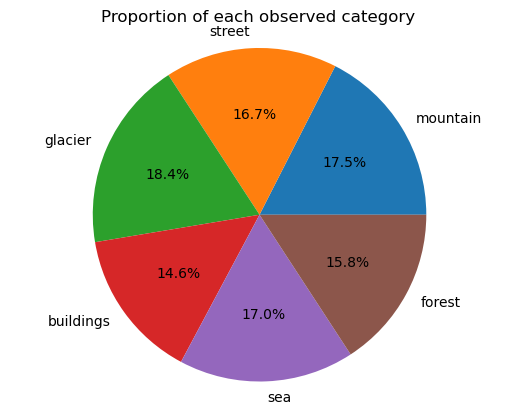

In [15]:
plt.pie(df['Test'],
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [16]:
def displayimagebyindex(index,dset='Train'):
    if dset=='Train':
        img=train_images[index]
        lbl=list(pd.Series(train_labels[index]).map(mapclass))[0]
    else:
        img=test_images[index]
        lbl=list(pd.Series(test_labels[index]).map(mapclass))[0]
    plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('{} Image #{} : {}'.format(dset,index,lbl))
    plt.show()

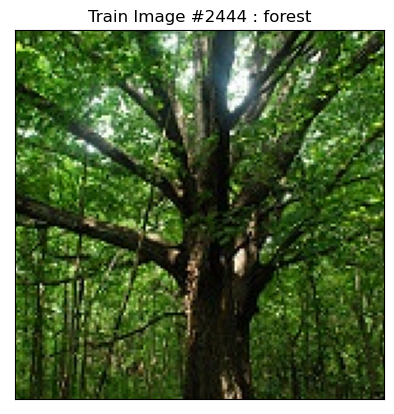

In [17]:
displayimagebyindex(2444,dset='Train')

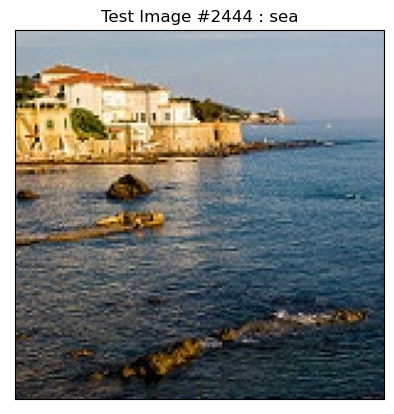

In [18]:
displayimagebyindex(2444,dset='Test')

In [37]:
#Building a model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax))

In [38]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
88/88 [==============================] - 73s 832ms/step - loss: 1.2724 - accuracy: 0.5307 - val_loss: 0.9374 - val_accuracy: 0.6430
Epoch 2/15
88/88 [==============================] - 73s 827ms/step - loss: 0.8163 - accuracy: 0.6986 - val_loss: 0.7888 - val_accuracy: 0.7089
Epoch 3/15
88/88 [==============================] - 72s 823ms/step - loss: 0.6597 - accuracy: 0.7575 - val_loss: 0.7152 - val_accuracy: 0.7403
Epoch 4/15
88/88 [==============================] - 72s 823ms/step - loss: 0.5162 - accuracy: 0.8154 - val_loss: 0.6810 - val_accuracy: 0.7634
Epoch 5/15
88/88 [==============================] - 75s 848ms/step - loss: 0.4109 - accuracy: 0.8605 - val_loss: 0.6702 - val_accuracy: 0.7699
Epoch 6/15
88/88 [==============================] - 75s 848ms/step - loss: 0.2967 - accuracy: 0.9044 - val_loss: 0.7310 - val_accuracy: 0.7520
Epoch 7/15
88/88 [==============================] - 75s 851ms/step - loss: 0.2116 - accuracy: 0.9337 - val_loss: 0.7792 - val_accuracy: 0.7713

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 5s 49ms/step - loss: 0.8562 - accuracy: 0.7667


In [ ]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)

In [ ]:
def checkpredictions(index):
    displayimagebyindex(index,dset='Test')
    print('Predicted Class : ')
    print("     ",list(pd.Series(pred_labels[index]).map(mapclass))[0])

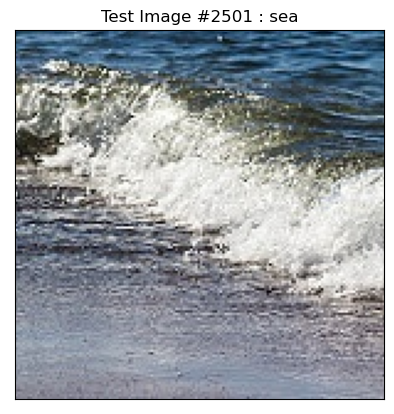

Predicted Class : 
      glacier


In [42]:
checkpredictions(np.random.randint(1,2999))

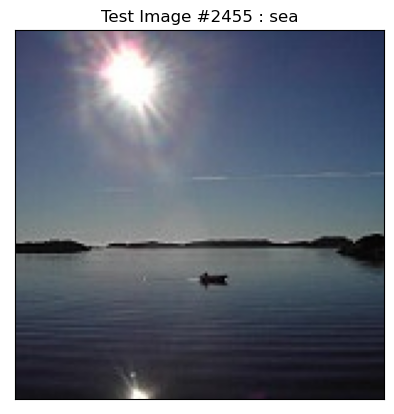

Predicted Class : 
      sea


In [ ]:
checkpredictions(np.random.randint(1,2999))

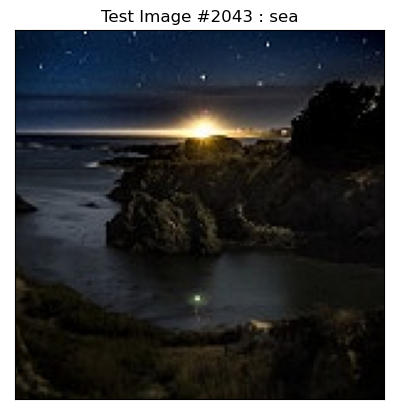

Predicted Class : 
      sea


In [ ]:
checkpredictions(np.random.randint(1,2999))

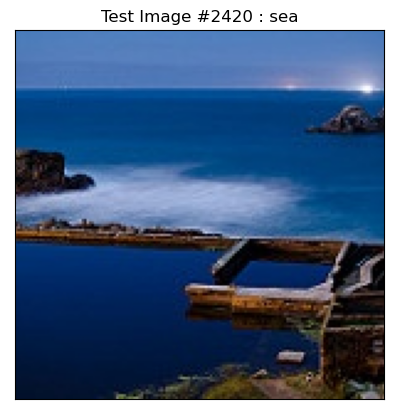

Predicted Class : 
      sea


In [ ]:
checkpredictions(np.random.randint(1,2999))

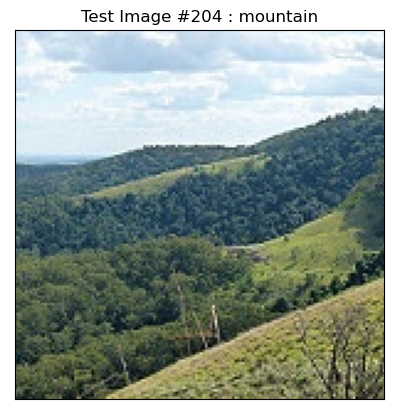

Predicted Class : 
      mountain


In [ ]:
checkpredictions(np.random.randint(1,2999))

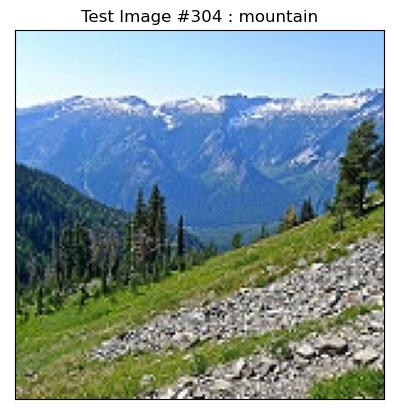

Predicted Class : 
      mountain


In [ ]:
checkpredictions(np.random.randint(1,2999))

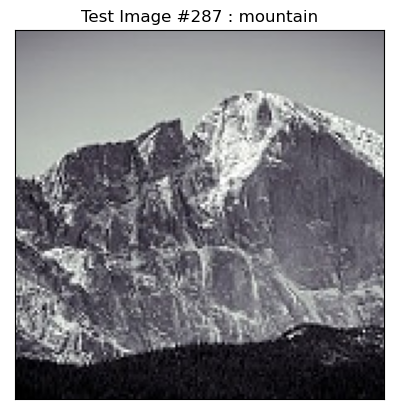

Predicted Class : 
      glacier


In [ ]:
checkpredictions(np.random.randint(1,2999))

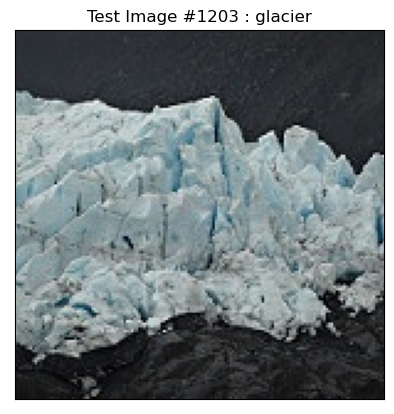

Predicted Class : 
      glacier


In [ ]:
checkpredictions(np.random.randint(1,2999))

In [ ]:
confusion_matrix(test_labels,pred_labels)

array([[384,   5,  65,  10,  60,   1],
       [  5, 383,  14,  66,   9,  24],
       [ 76,   4, 399,  11,  59,   4],
       [ 12,  57,  16, 312,  30,  10],
       [ 56,   6,  44,  14, 389,   1],
       [  5,  18,   4,  13,   1, 433]])

In [ ]:
mapclass

{0: 'mountain',
 1: 'street',
 2: 'glacier',
 3: 'buildings',
 4: 'sea',
 5: 'forest'}

In [ ]:
# We see that Model is confusing between Class 2 (glacier) and Class 0 (mountain),
# and Class 3 (buildings) and Class 1 (street)
print(classification_report(test_labels,pred_labels))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       525
           1       0.81      0.76      0.79       501
           2       0.74      0.72      0.73       553
           3       0.73      0.71      0.72       437
           4       0.71      0.76      0.74       510
           5       0.92      0.91      0.91       474

    accuracy                           0.77      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.77      0.77      0.77      3000

